# Experiment 3: The Faucett Coefficient

A Custom coefficient designed to be more lenient on answers.

**faucett coefficient**
$$
K(p) = (\frac{\lvert X \cap Y \rvert}{\lvert X \cup Y \rvert})^{p},\ where\ 0.5 \leq p < 1
$$

The idea is you want to take a power greater than 0.5 and less than 1 of the ratio between the overlapping words and the combined words of both sets.

Taking the power means that relatively low overlap scores like 0.1 will generally be scored more highly 0.1^{1/2} = 0.31 for example.

Also by putting the union of both sentences' words in the denominator, we are still penalizing for longer sentences which have less overlap.

In [1]:
import sys
import numpy as np
sys.path.append('../')
import libs.utils as utils
import libs.stats as stats
import libs.preprocessing as pp
import libs.word_overlap as wo
from importlib import reload
import spacy

In [2]:
df2_en = utils.load_dataframe(language='en', version=2)
display(df2_en.head(2))
print(len(df2_en))

nlp_en = spacy.load('en')

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    3.5  
1   To simulate portions of the desired final pro...    5.0

2442


## E1.1 v2.0_en English Language Dataset

In [3]:
pipeline_phases = { 'lowercase' : pp.lowercase, 
                    'stopwords' : pp.remove_stopwords,
                    'punctuation' : pp.remove_punctuation,
                    'stemming' : pp.stem}

pipeline1 = pp.create_pipeline(pipeline_phases, tokenizer=pp.tokenize)

res_e1_1 = wo.execute_word_overlap_model(df2_en, pipeline1, wo.faucett_coefficient)

Accuracy: 13.104%
Precision: 50.492%
Recall: 13.104%
F1-Measure: 14.360%
Pearson's R: 0.45
Cohen's Kappa: 0.01
RMSE: 2.36
MAE: 2.01
Y-True Mean: 4.05
Y-Pred Mean: 2.10
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.34


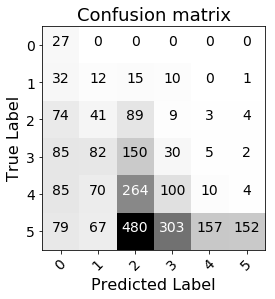

In [4]:
stats.print_big4(res_e1_1['y_true'], res_e1_1['y_pred'])
stats.print_stats(res_e1_1['y_true'], res_e1_1['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e1_1['y_true'], res_e1_1['y_pred']), classes=np.unique(res_e1_1['y_true']))

## E1.2 v2.0_en English Language Dataset

1. Spacy Preprocessing (Lemmatization)

In [5]:
pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS) }

pipeline1_2 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)

res_e1_2 = wo.execute_word_overlap_model(df2_en, pipeline1_2, wo.faucett_coefficient)

Accuracy: 16.298%
Precision: 51.413%
Recall: 16.298%
F1-Measure: 16.301%
Pearson's R: 0.40
Cohen's Kappa: 0.03
RMSE: 1.91
MAE: 1.61
Y-True Mean: 4.05
Y-Pred Mean: 2.59
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.01


/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/che/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


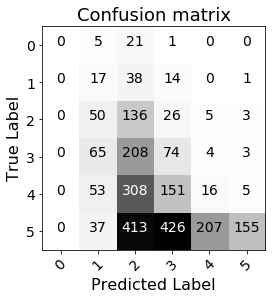

In [10]:
stats.print_big4(res_e1_2['y_true'], res_e1_2['y_pred'])
stats.print_stats(res_e1_2['y_true'], res_e1_2['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e1_2['y_true'], res_e1_2['y_pred']), classes=np.unique(res_e1_2['y_true']))

## E2.1 v2.0_en English Pass / Fail

In [11]:
df2_en_pf = utils.load_dataframe(language='en', version=2, pass_fail=True)
display(df2_en_pf.head(2))
print(len(df2_en_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.EN_STOPS) }

pipeline2_1 = pp.create_spacy_pipeline(nlp=nlp_en, pipeline_map=pipeline_phases)

res_e2_1 = wo.execute_word_overlap_model(df2_en_pf, pipeline2_1, wo.faucett_coefficient)

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   
1  1.1    1    1   What is the role of a prototype program in pr...   

                                        Model Answer  \
0   To simulate the behaviour of portions of the ...   
1   To simulate the behaviour of portions of the ...   

                                      Student Answer  Score  
0   High risk problems are address in the prototy...    1.0  
1   To simulate portions of the desired final pro...    1.0

2442


Accuracy: 50.082%
Precision: 90.547%
Recall: 50.082%
F1-Measure: 60.171%
Pearson's R: 0.17
Cohen's Kappa: 0.08
RMSE: 0.71
MAE: 0.50
Y-True Mean: 0.92
Y-Pred Mean: 0.45
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.50


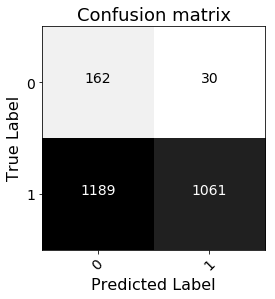

In [12]:
res_e2_1['y_pred'] = utils.convert_to_pass_fail(res_e2_1['y_pred'])

stats.print_big4(res_e2_1['y_true'], res_e2_1['y_pred'])
stats.print_stats(res_e2_1['y_true'], res_e2_1['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e2_1['y_true'], res_e2_1['y_pred']), classes=np.unique(res_e2_1['y_true']))

## E3.1 v2.0_de German 

1. Lemmatization

In [13]:
df2_de = utils.load_dataframe(language='de', version=2)
display(df2_de.head(2))
print(len(df2_de))

nlp_de = spacy.load('de')

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.DE_STOPS) }

pipeline3_1 = pp.create_spacy_pipeline(nlp=nlp_de, pipeline_map=pipeline_phases)

res_e3_1 = wo.execute_word_overlap_model(df2_de, pipeline3_1, wo.faucett_coefficient)

AID  QID                                             Prompt  \
0    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   
1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                        Model Answer  Score  \
0  Um das Verhalten von Teilen des gewünschten So...    3.5   
1  Um das Verhalten von Teilen des gewünschten So...    5.0   

                                      Student Answer  
0  In dem Prototyp-Programm werden Probleme mit h...  
1  Teile des gewünschten Endprodukts mit einem sc...

2442


Accuracy: 8.763%
Precision: 51.428%
Recall: 8.763%
F1-Measure: 9.821%
Pearson's R: 0.35
Cohen's Kappa: 0.01
RMSE: 3.00
MAE: 2.64
Y-True Mean: 4.05
Y-Pred Mean: 1.43
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.37


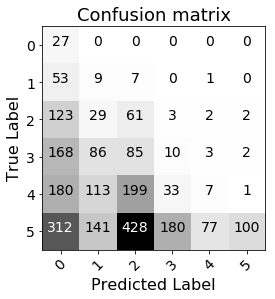

In [14]:
stats.print_big4(res_e3_1['y_true'], res_e3_1['y_pred'])
stats.print_stats(res_e3_1['y_true'], res_e3_1['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e3_1['y_true'], res_e3_1['y_pred']), classes=np.unique(res_e3_1['y_true']))

## E3.2 v2.0_de German Pass / Fail

In [15]:
df2_de_pf = utils.load_dataframe(language='de', version=2, pass_fail=True)
display(df2_de_pf.head(2))
print(len(df2_de_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.DE_STOPS) }

pipeline3_2 = pp.create_spacy_pipeline(nlp=nlp_de, pipeline_map=pipeline_phases)

res_e3_2 = wo.execute_word_overlap_model(df2_de_pf, pipeline3_2, wo.faucett_coefficient)

AID  QID                                             Prompt  \
0    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   
1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                        Model Answer  Score  \
0  Um das Verhalten von Teilen des gewünschten So...    1.0   
1  Um das Verhalten von Teilen des gewünschten So...    1.0   

                                      Student Answer  
0  In dem Prototyp-Programm werden Probleme mit h...  
1  Teile des gewünschten Endprodukts mit einem sc...

2442


Accuracy: 24.611%
Precision: 91.548%
Recall: 24.611%
F1-Measure: 29.953%
Pearson's R: 0.11
Cohen's Kappa: 0.03
RMSE: 0.87
MAE: 0.75
Y-True Mean: 0.92
Y-Pred Mean: 0.17
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.38


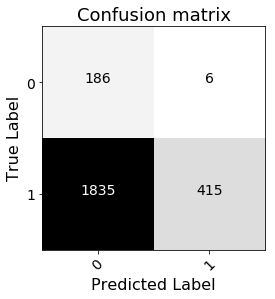

In [16]:
res_e3_2['y_pred'] = utils.convert_to_pass_fail(res_e3_2['y_pred'])

stats.print_big4(res_e3_2['y_true'], res_e3_2['y_pred'])
stats.print_stats(res_e3_2['y_true'], res_e3_2['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e3_2['y_true'], res_e3_2['y_pred']), classes=np.unique(res_e3_2['y_true']))

## E4.1 v2.0_es Spanish - regular

In [17]:
df2_es = utils.load_dataframe(language='es', version=2)
display(df2_es.head(2))
print(len(df2_es))

nlp_es = spacy.load('es')

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.ES_STOPS) }

pipeline4_1 = pp.create_spacy_pipeline(nlp=nlp_es, pipeline_map=pipeline_phases)

res_e4_1 = wo.execute_word_overlap_model(df2_es, pipeline4_1, wo.faucett_coefficient)

AID  QID                                             Prompt  \
0    1    1  ¿Cuál es el papel de un programa prototipo en ...   
1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                        Model Answer  Score  \
0  Para simular el comportamiento de porciones de...    3.5   
1  Para simular el comportamiento de porciones de...    5.0   

                                      Student Answer  
0  Los problemas de alto riesgo se abordan en el ...  
1  Para simular porciones del producto final dese...

2442


Accuracy: 9.664%
Precision: 48.328%
Recall: 9.664%
F1-Measure: 9.401%
Pearson's R: 0.41
Cohen's Kappa: 0.00
RMSE: 2.62
MAE: 2.28
Y-True Mean: 4.05
Y-Pred Mean: 1.81
Y-True Std Deviation: 1.20
Y-Pred Std Deviation: 1.29


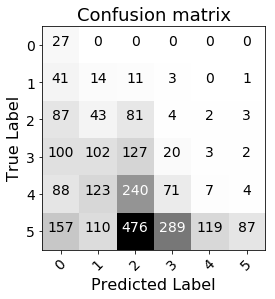

In [18]:
stats.print_big4(res_e4_1['y_true'], res_e4_1['y_pred'])
stats.print_stats(res_e4_1['y_true'], res_e4_1['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e4_1['y_true'], res_e4_1['y_pred']), classes=np.unique(res_e4_1['y_true']))

## E4.2 v2.0_es Spanish Pass/Fail

In [19]:
df2_es_pf = utils.load_dataframe(language='es', version=2, pass_fail=True)
display(df2_es_pf.head(2))
print(len(df2_es_pf))

pipeline_phases = { 'punctuation' : pp.spacy_punctuation,
                    'lemmatization' : pp.spacy_lemmatize,
                    'stopwords' : pp.create_stopword_remover(pp.ES_STOPS) }

pipeline4_2 = pp.create_spacy_pipeline(nlp=nlp_es, pipeline_map=pipeline_phases)

res_e4_2 = wo.execute_word_overlap_model(df2_es_pf, pipeline4_2, wo.faucett_coefficient)

AID  QID                                             Prompt  \
0    1    1  ¿Cuál es el papel de un programa prototipo en ...   
1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                        Model Answer  Score  \
0  Para simular el comportamiento de porciones de...    1.0   
1  Para simular el comportamiento de porciones de...    1.0   

                                      Student Answer  
0  Los problemas de alto riesgo se abordan en el ...  
1  Para simular porciones del producto final dese...

2442


Accuracy: 32.146%
Precision: 91.269%
Recall: 32.146%
F1-Measure: 40.259%
Pearson's R: 0.13
Cohen's Kappa: 0.04
RMSE: 0.82
MAE: 0.68
Y-True Mean: 0.92
Y-Pred Mean: 0.25
Y-True Std Deviation: 0.27
Y-Pred Std Deviation: 0.43


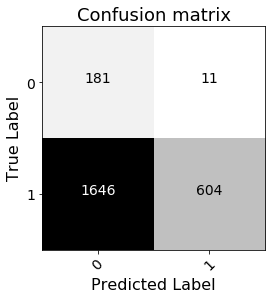

In [20]:
res_e4_2['y_pred'] = utils.convert_to_pass_fail(res_e4_2['y_pred'])

stats.print_big4(res_e4_2['y_true'], res_e4_2['y_pred'])
stats.print_stats(res_e4_2['y_true'], res_e4_2['y_pred'])
stats.plot_confusion_matrix(stats.cm(res_e4_2['y_true'], res_e4_2['y_pred']), classes=np.unique(res_e4_2['y_true']))